In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report


league_data = pd.read_csv('./preprocessed_2023_LoL_esports_match_data_from_OraclesElixir.csv')
league_data.head()

features = ['champion', 'kills', 'deaths', 'assists', 'firstbloodkill', 'firstbloodassist', 'firstbloodvictim']
target = 'earned gpm'

def gpm_range(gpm):
    if gpm < 200:
        return 'low'
    elif 200 <= gpm < 300:
        return 'medium'
    else:
        return 'high'

league_data['gpm_range'] = league_data['earned gpm'].apply(gpm_range)
league_data.head()

,patch,side,position,playername,champion,gamelength,result,kills,deaths,assists,...,opp_inhibitors,dpm,damagetakenperminute,damagemitigatedperminute,wpm,wcpm,vspm,earned gpm,cspm,gpm_range
0,13.01,0,0,0,0,2612,1,4,0,6,...,0.0,328.0934,719.5406,878.9127,0.4594,0.1149,1.1256,304.3874,9.1654,high
1,13.01,0,1,1,1,2612,1,2,2,4,...,0.0,142.8560,847.3047,1513.9663,0.4135,0.2527,1.4012,148.8055,3.6524,low
2,13.01,0,2,2,2,2612,1,2,2,11,...,0.0,620.8576,365.3522,323.7289,0.5283,0.2297,1.1256,232.4196,7.7412,medium
3,13.01,0,3,3,3,2612,1,5,1,7,...,0.0,964.8928,398.4533,234.3721,0.3905,0.1378,1.0796,269.4028,8.4992,medium
4,13.01,0,4,4,4,2612,1,0,2,10,...,0.0,130.1991,360.2757,284.1501,1.1945,0.1838,2.4349,73.7825,0.4824,low


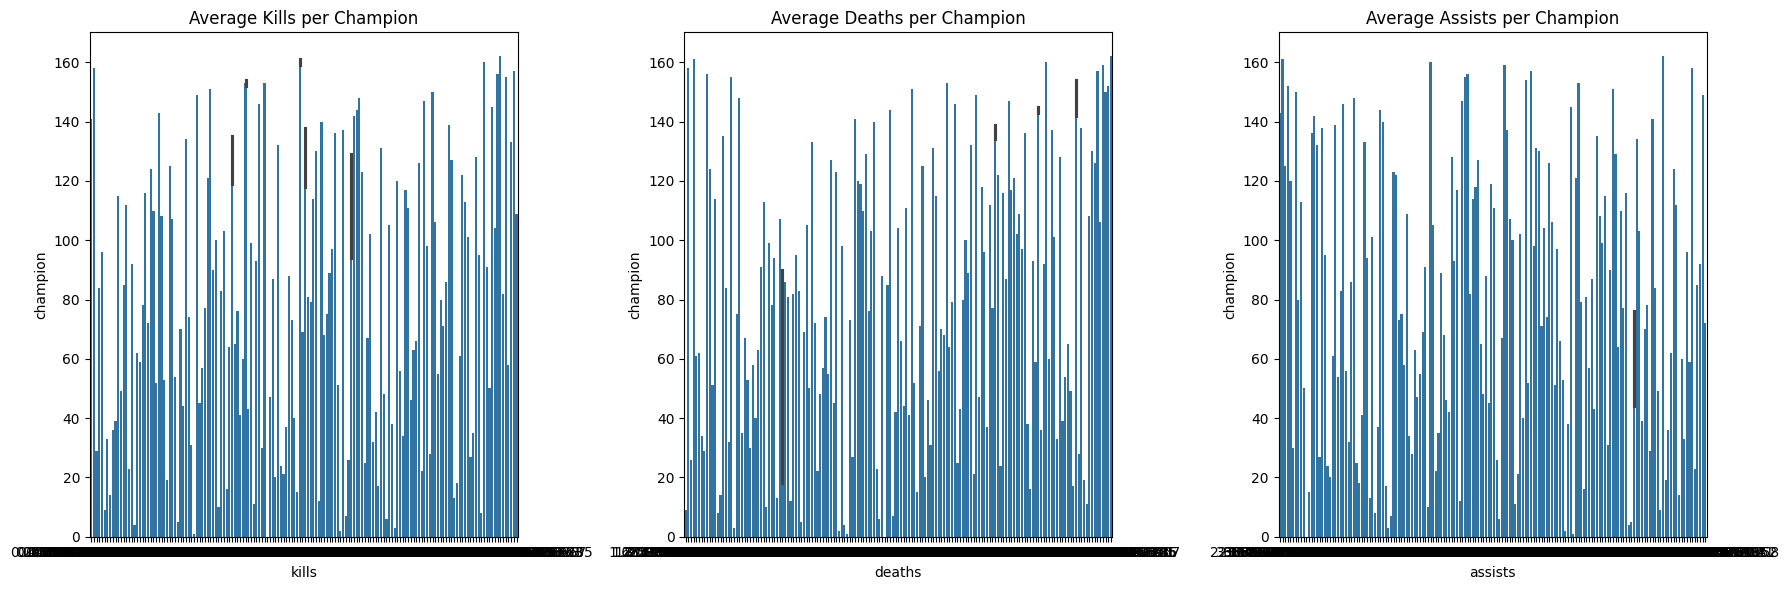

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 각 챔피언에 대해 'kills', 'deaths', 'assists'의 평균을 구함
champion_stats = league_data.groupby('champion')[['kills', 'deaths', 'assists']].mean().reset_index()

# 그래프를 그리기 위해 'kills', 'deaths', 'assists'에 대해 각각 차례로 시각화
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 'kills' 그래프
sns.barplot(x='kills', y='champion', data=champion_stats, ax=axes[0])
axes[0].set_title('Average Kills per Champion')

# 'deaths' 그래프
sns.barplot(x='deaths', y='champion', data=champion_stats, ax=axes[1])
axes[1].set_title('Average Deaths per Champion')

# 'assists' 그래프
sns.barplot(x='assists', y='champion', data=champion_stats, ax=axes[2])
axes[2].set_title('Average Assists per Champion')

plt.tight_layout()
plt.show()

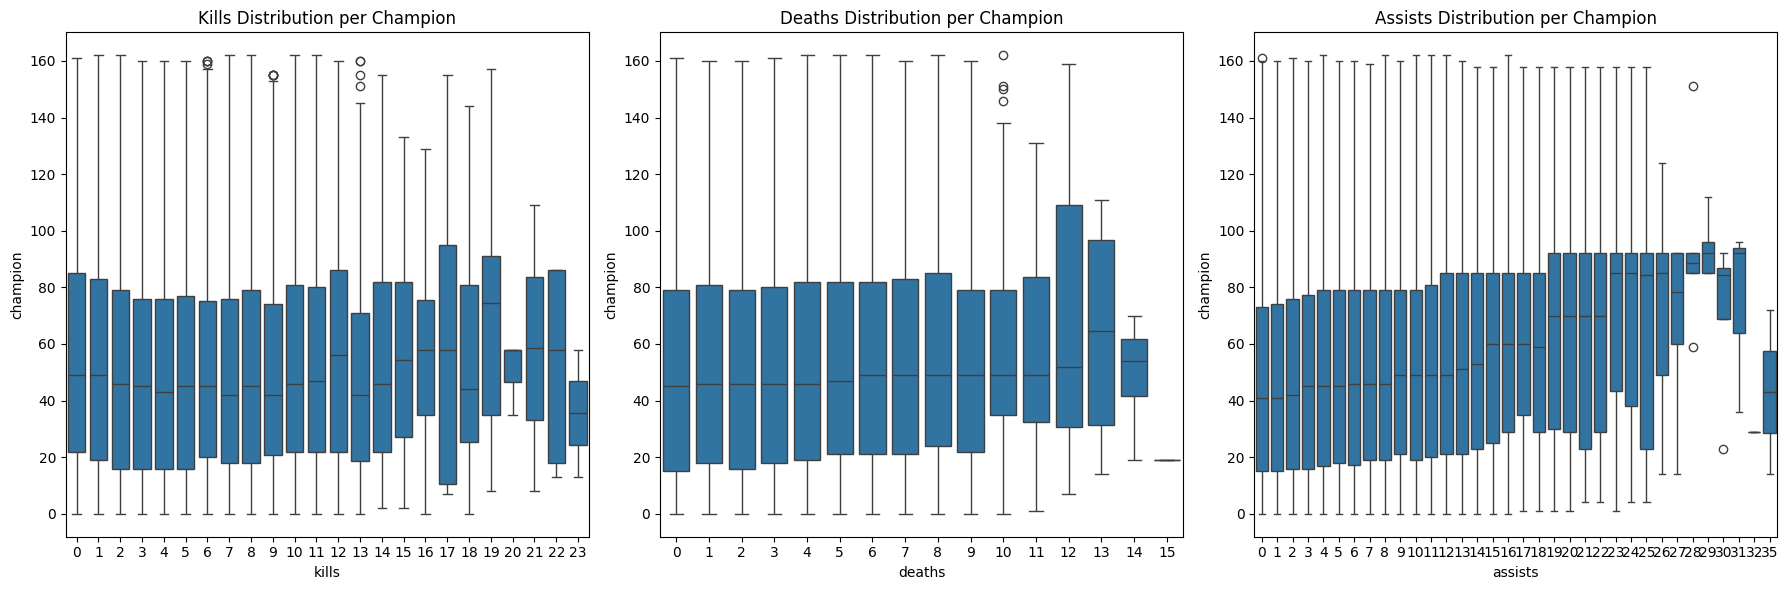

In [ ]:
# 각 챔피언에 대한 'kills', 'deaths', 'assists'의 분포를 박스 플롯으로 그림
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 'kills' 박스 플롯
sns.boxplot(x='kills', y='champion', data=league_data, ax=axes[0])
axes[0].set_title('Kills Distribution per Champion')

# 'deaths' 박스 플롯
sns.boxplot(x='deaths', y='champion', data=league_data, ax=axes[1])
axes[1].set_title('Deaths Distribution per Champion')

# 'assists' 박스 플롯
sns.boxplot(x='assists', y='champion', data=league_data, ax=axes[2])
axes[2].set_title('Assists Distribution per Champion')

plt.tight_layout()
plt.show()


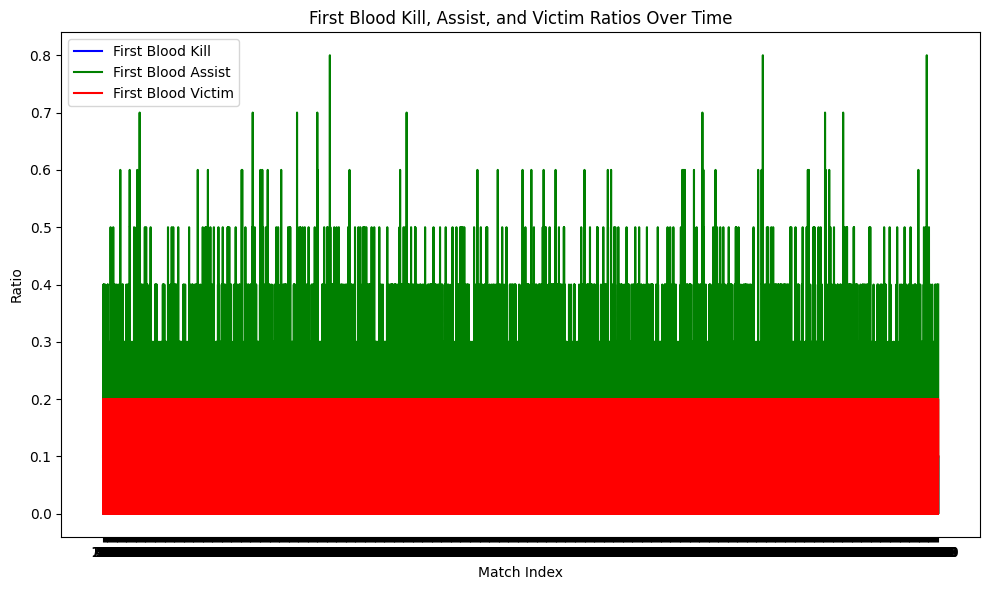

In [8]:
# 인덱스에 표시할 값의 간격을 줄여주기 위해 특정 간격을 선택합니다.
interval = 100  # 10번째마다 표시하도록 설정

plt.figure(figsize=(10, 6))

# 각 변수에 대한 꺾은선 그래프를 겹쳐서 그림
plt.plot(league_data.index, league_data['firstbloodkill_ratio'], label='First Blood Kill', color='blue')
plt.plot(league_data.index, league_data['firstbloodassist_ratio'], label='First Blood Assist', color='green')
plt.plot(league_data.index, league_data['firstbloodvictim_ratio'], label='First Blood Victim', color='red')

# x축의 레이블을 특정 간격으로만 표시
plt.xticks(league_data.index[::interval])  # 10번째 인덱스마다 표시

# 그래프에 제목, 레이블 등을 추가
plt.title('First Blood Kill, Assist, and Victim Ratios Over Time')
plt.xlabel('Match Index')
plt.ylabel('Ratio')
plt.legend()

plt.tight_layout()
plt.show()
